In [1]:
# Definição do problema: o dataset possui dados de alunos que realizaram um treinamento de capacitação oferecido por uma empresa.
# O desafio é analisar a possibilidade dos alunos fazerem o treinamento tendo em vista a mudança de emprego ou apenas para capacitação. O objetivo da empresa é contratar pessoas com o perfil adequado, a fim de reduzir o custo e o tempo de contratação, como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos.  
# Link para download do dataset original: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?resource=download

In [2]:
# Sempre conferir versão do python.
from platform import python_version
print('Versão do python:', python_version())

Versão do python: 3.9.13


In [3]:
# Instalar o pacote watermark, esse pacote é usado pra gravar as versões de outros pacotes usados nesse jupyter notebook. O -q representau uma instalação silenciosa (quiet) e o -U representa update (para atualizar caso exista uma versão mais nova).
!pip install -q -U watermark

In [4]:
# Instalar o pacote missingno, ele permite criar mapas de valores ausentes.
!pip install -q missingno

In [5]:
# Instalar o pacote category encoders, permite aplicar categorização nas variáveis.
!pip install -q category_encoders

In [6]:
# Instalar o pacote plotly, permite criação de gráficos em linguagem python.
!pip install -q plotly

In [7]:
# Imports dos pacotes, separei por categorias para melhor organização e não esquecer nenhum.

# Manipulação de dados.
import pandas as pd
import numpy as np

# Visualização.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística.
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning.
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [8]:
# Conferir as versões dos pacotes.
%reload_ext watermark
%watermark -a "Jurandir" --iversions

Author: Jurandir

numpy            : 1.21.5
plotly           : 5.9.0
pandas           : 1.4.4
seaborn          : 0.11.2
missingno        : 0.5.1
scipy            : 1.9.1
matplotlib       : 3.5.2
category_encoders: 2.6.0
sys              : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]



In [9]:
# Carregar o dataset.
df = pd.read_csv('Datasetoriginal2/aug_train.csv')

In [10]:
# Entender quantas registros e colunas são no dataset.
df.shape

(19158, 14)

In [11]:
# Visualizar as colunas.
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [12]:
# Ter uma amostragem inicial dos dados.
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
# Ver informações.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [14]:
# Já podemos ver que os dados não estão prontos para análise, precisam ser tratados. Um exemplo, a variável target está como float64, mas ela é uma variável categória representada por um número. Ela é nossa variável alvo, significa se o aluno deixou ou não o emprego.

## Análise Exploratória de Dados

In [15]:
# Descrevendo os dados não categóricos.
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [16]:
# Descrevendo os dados numéricos, eliminando variáveis que não são úteis, pois não são numéricas. Poderia usar apenas o describe também, sem dropar as colunas.
df.describe().drop(columns =  ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [17]:
# Pesquisando no google, o CDI acima de 0.800 é classificado como muito alto. Na tabela, em CDI, os valores médios são 0.828848, mediana 0.903, e desvio padrão 0,123. Isso significa que a maioria dos candidatos é de cidade bem desenvolvida. O desvio padrão baixo significa que a dispersão de valores também é baixa.
# Em TH, a média é 65.366896, a mediana é 23.000000 e o máximo é 336.000000, isso significa que existem mais alunos com poucas horas de treinamento. Mas, alguns levam muito tempo para concluir o treinamento. É interessante saber da área de negócio se essa informação procede, é importante saber a veracidade da análise de dados.

### Visualizando as Variáveis Categóricas

In [18]:
# Converter em lista as colunas das variáveis categóricas. Segundo a análise do dataframe, são as colunas de índice 3 a 11.
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

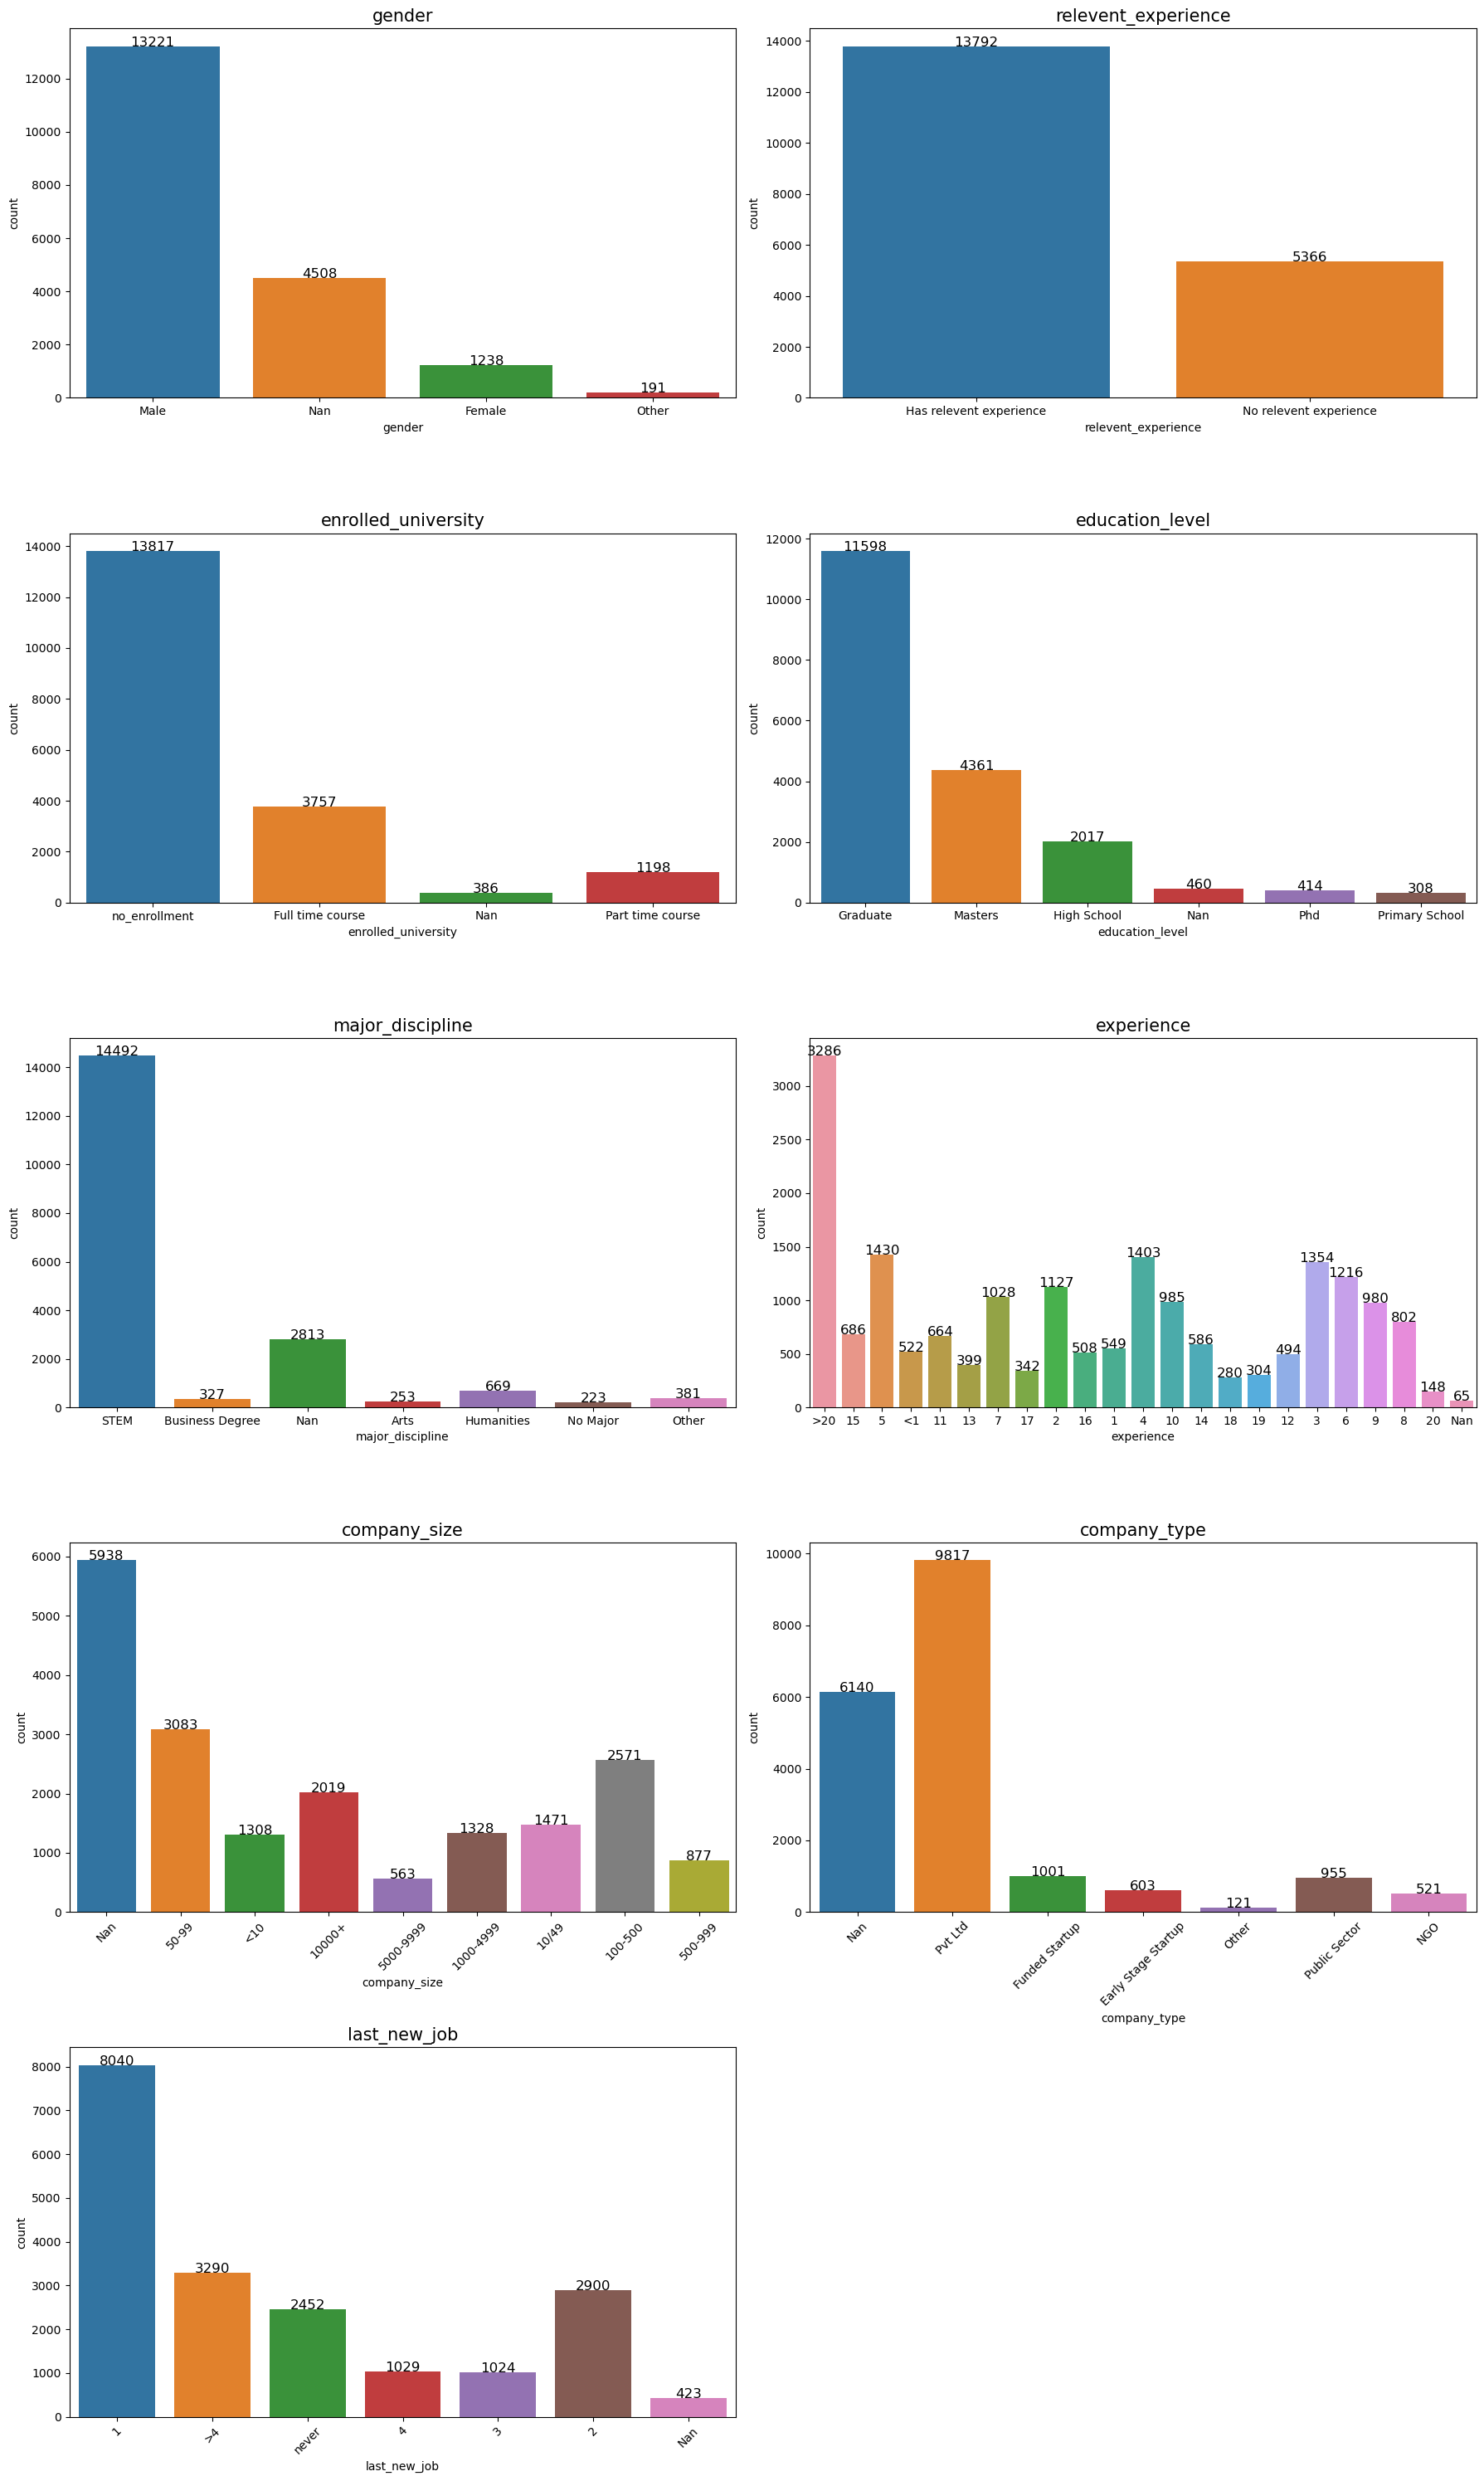

In [19]:
# Visualização do plot para melhor análise das variáveis categóricas.

# Tamanho da figura.
plt.figure(figsize = (18,30))

# Lista de colunas.
column_list = list(df.columns.values)[3:12]

# Contador.
A = 0

# Loop.
for i in column_list:
    A += 1
    plt.subplot(5,2,A)
    ax = sns.countplot(data = df.fillna('Nan'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
        if A >= 7:
            plt.xticks(rotation = 45)
            
# Layout.
plt.tight_layout(h_pad = 2)

In [20]:
# É interessante interpretar cada gráfico para saber se os dados fazem sentido com a realidade. Questionar a coleta de dados o tempo inteiro é importante.
# Importante saber que análise de dados não cria padrões, ela identifica padrões se eles existirem.
# Para a interpretação dos gráficos, é importante olhar no dicionário de dados o que significa cada variável.
# Tendo esses pressupostos, a interpretação nos diz que as variáveis aparentam fazer sentido com a realidade.

### Verificando a Distribuição das Variáveis Numéricas

In [21]:
# Descrevendo os dados numéricos, eliminando variáveis que não são úteis, pois não são numéricas. Poderia usar apenas o describe também, sem dropar as colunas.
df.describe().drop(columns =  ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


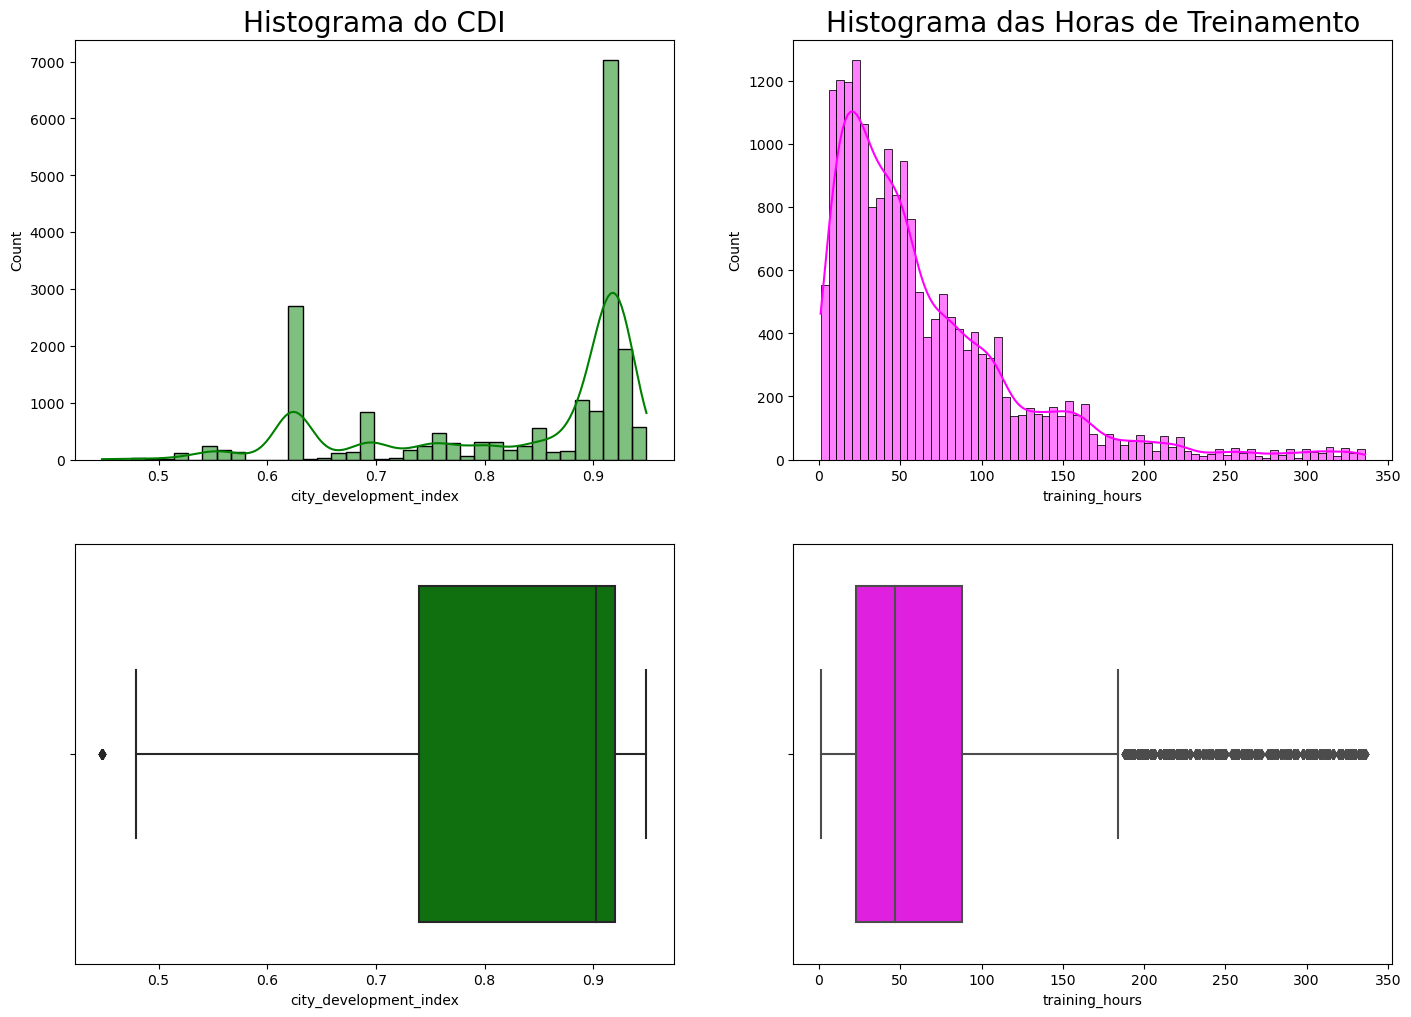

In [22]:
# Visualização do histograma e boxplot para melhor análise das variáveis numéricas.

# Figura.
plt.figure(figsize = (17,12))

# Subplot com histogramas.
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "Magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots.
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "Magenta")

plt.show()

In [23]:
# Histogramas trazem as distribuições de frequências dos valores das variáveis. É bom para entender se os valores estão próximos da média, abaixo da média, muito distante da média. Ele transforma o resumo estatístico de uma forma visual.
# A distribuição normal (ou gaussiana) é uma curva simétrica em torno de seu ponto médio, tendo um formato de sino. Uma distribuição normal perfeita tem média, moda e mediana iguais. A partir de uma distribuição normal, existem técnicas a específicas de análise a serem aplicadas. Quando a distribuição não é normal, as técnicas já são outras. Estratégias paramétricas ou não paramétricas.
# No histograma de CDI existem duas curvas, sendo uma distribuição bimodal. Tem duas modas, ou seja, dois valores que aparecem com muita frequência nessa variável. 
# No histograma de horas de treinamento, a curva está muito concentrada ao lado esquerdo, provando também não existir uma distribuição normal.
# É ESSENCIAL verificarmos a normalidade das variáveis. 
# Pelos boxplots, vemos que eles são inversos. No primeiro os valores estão abaixo da mediana (Q2) e no segundo os valores estão mais acima da mediana (Q2). É interessante também para vermos outliers (valores fora do padrão normal), no segundo boxplot principalmente. Precisamos interpretá-los para tomar decisões. É interessante visualizarmos os boxplots na horizontal pois eles devem seguir o comportamento dos histogramas.

In [24]:
# Teste de normalidade de distribuição das variáveis numéricas, é bom sempre validar a suposição visual com testes estatísticos.
# Lista com as variáveis numéricas .
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    # Cálculo da normalidade.
    stats, pval = normaltest(df[i])
    # Checar valor-p, um teste estatístico que faz o teste de hipótese.
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else: 
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


In [25]:
# As duas variáveis não seguem uma distribuição normal. Para análise numérica, usaremos um método não paramétrico.

### Correlação das Variáveis

### Correlação de Spearman Entre as Variáveis Numéricas

In [26]:
# Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [27]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [28]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [29]:
# A variável last new job e last experience aparentam ser variáveis numéricas de acordo com o objetivo. Importante fazer experimentação para garantir.

In [30]:
# Criar uma cópia do dataframe original.
df_numerical = df.copy()

In [31]:
# Filtrar o dataframe e contar os elementos únicos.
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [32]:
# Realmente, a variável parece ser interessante de ser usada de uma maneira numérica. Sendo assim, é preciso convertê-la em uma variável numérica remondo os sinais de ">" e "<".
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [33]:
# Filtrar o dataframe e contar os elementos únicos.
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [34]:
# Filtrar o dataframe e contar os elementos únicos.
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [35]:
# Realmente, a variável parece ser interessante de ser usada de uma maneira numérica. Sendo assim, é preciso convertê-la em uma variável numérica remondo os sinais de ">" e "never".
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [36]:
# Filtrar o dataframe e contar os elementos únicos
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [37]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [38]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [39]:
# Observar que a variável "experience" e "last_new_job" agora estão como float64, significando que deu certo a conversão.

In [40]:
# Calcular a correlação pelo coeficiente de spearman.
# Fazendo a análise da correlação. Lembrando que utilizando a função "corr", ele desconsiderava variáveis do tipo "objeto".
df_numerical.drop("enrollee_id", axis = 1 ).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


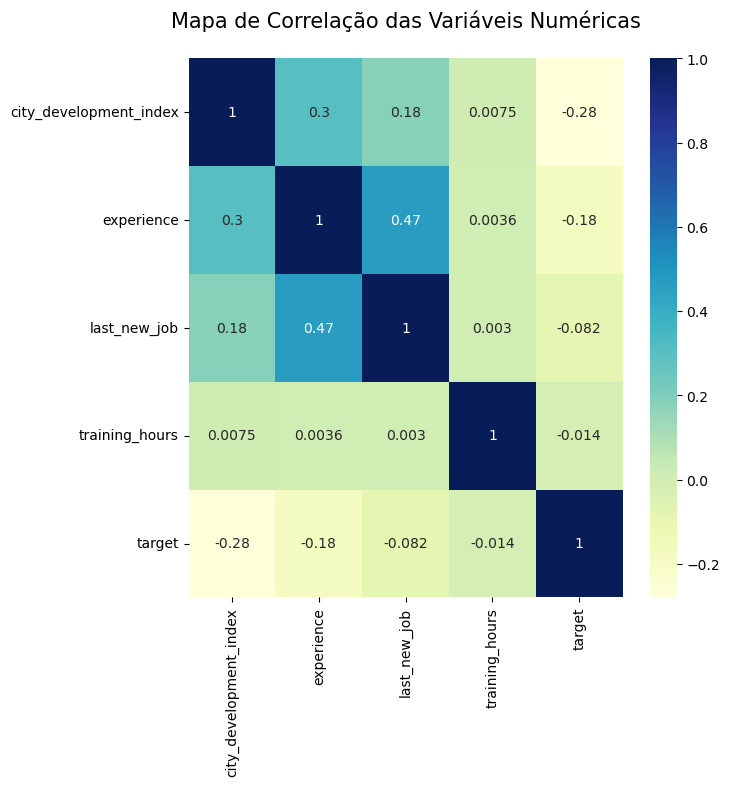

In [41]:
# Cálculo de mapa de correlação com um mapa de calor (heatmap).
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [42]:
# +1 indica uma alta correlação positiva: aumenta o valor de uma variável, aumenta o valor da outra. -1 indica uma alto correlação negativa: aumenta o valor de uma variável, diminui o valor da outra. Próximo de 0 indica que não há correlação.
# Interpretando a correlação de spearman, last_new_job e experience tem uma correlação média (0,473284), enquanto outros possuem uma correlação fraca. As variáveis last_new_job e training_hours tem correlação próxima de 0 com a variável alvo, podendo ser descartadas.

### Associação Entre as Variáveis Categóricas

In [43]:
# Weight of Evidence (WOE) e Information Value (IV) são duas medidas usadas para analisar a  força  de  uma  variável  em  relaçãoà variável  alvo.Embora  possa  ser  usada  com  variáveis numéricas e categóricas normalmente usamos com variáveis categóricas.
# O  peso  da  evidência (Weight  of  Evidence) indica  o  poder  preditivo  de  uma  única característica em relação a sua característica independente.
# Por exemplo, considere a categoria C do recurso X. A proporção de eventos (0,16) é muito pequena em comparação com a proporção de não eventos (0,37). Isso implica que, se o valor do recurso X for C, é mais provável que o valor de destino seja 0 (não evento). O valor WOE apenas nos diz o quão confiantes estamos de que o recurso nos ajudará a prever a probabilidade de um evento corretamente.
# O valor WOE nos diz o poder preditivo de cada compartimento (classe) de um recurso. No entanto, um único valor que representa o poder preditivo de todo o recurso será útil na seleção de recursos. Isso é o IV (Information Value). Information Value, Poder de Previsão: < 0.02, não deve ser usado para previsão; 0.02 -0.1, preditor fraco; 0.1 -0.3, preditor médio; 0.3 -0.5, preditor forte; > 0.5, parece bom demais para ser verdade.
# O WOE (peso da evidência) é usado para calcular o IV (valor da informação).
# Embora  WOE  e  IV  sejam  altamente  úteis,  sempre  certificar  de  que  sejam  usados apenas quando a variável alvo é uma classe.

In [44]:
# Loop removendo as variáveis numéricas e também a variável alvo, uma vez que não é necessário calcular a relação dela com ela mesma. A coluna ID, city, companie e size não são úteis para a análise pois não apresentam uma informação útil no conjunto de dados. 
for i in df.drop(columns = ['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'experience',
                           'last_new_job',
                           'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                         .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
                         
    print(df_woe_iv, '\n--------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
--------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
--------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
--------------------------------------------
target                0.0       1.0       woe       iv
education_level      

<Figure size 1000x1200 with 0 Axes>

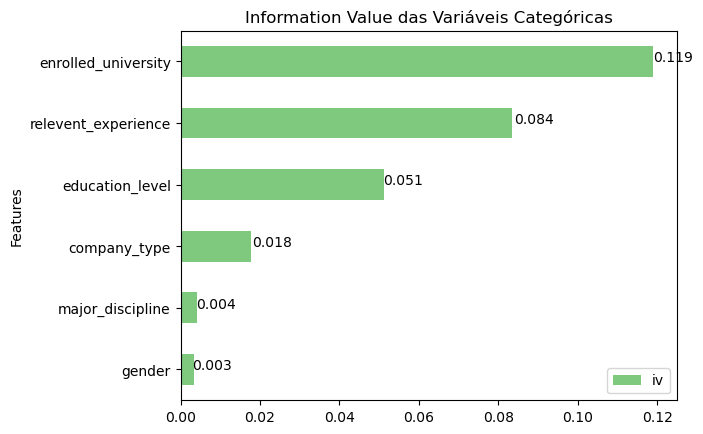

In [45]:
# Plot do Information Value para melhor visualização.
# Variáveis categóricas.
columns_cat = df.drop(columns = ['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'experience',
                           'last_new_job',
                           'company_size']).columns
    
# Criação de uma lista para o IV.
iv = []

# Loop.
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                         .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# Dataframe.
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}).set_index('Features').sort_values(by = 'iv')

# Plot.
# Figura.
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = 'Accent')
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc = "lower right")
plt.show()

In [46]:
# No gráfico, visualizamos a ordem dos valores conforme seu poder preditivo em relação ao alvo.
# Com base no seu valor IV, enrolled_university é um preditor médio (0.119), relevent_experience (0.084) e education_level (0.051) são preditores fracos e o restante das variáveis não são úteis para a previsão.

### Identificando Valores Ausentes

In [47]:
# Valor ausente é a ausência de dados, não necessariamente sendo um valor nulo.

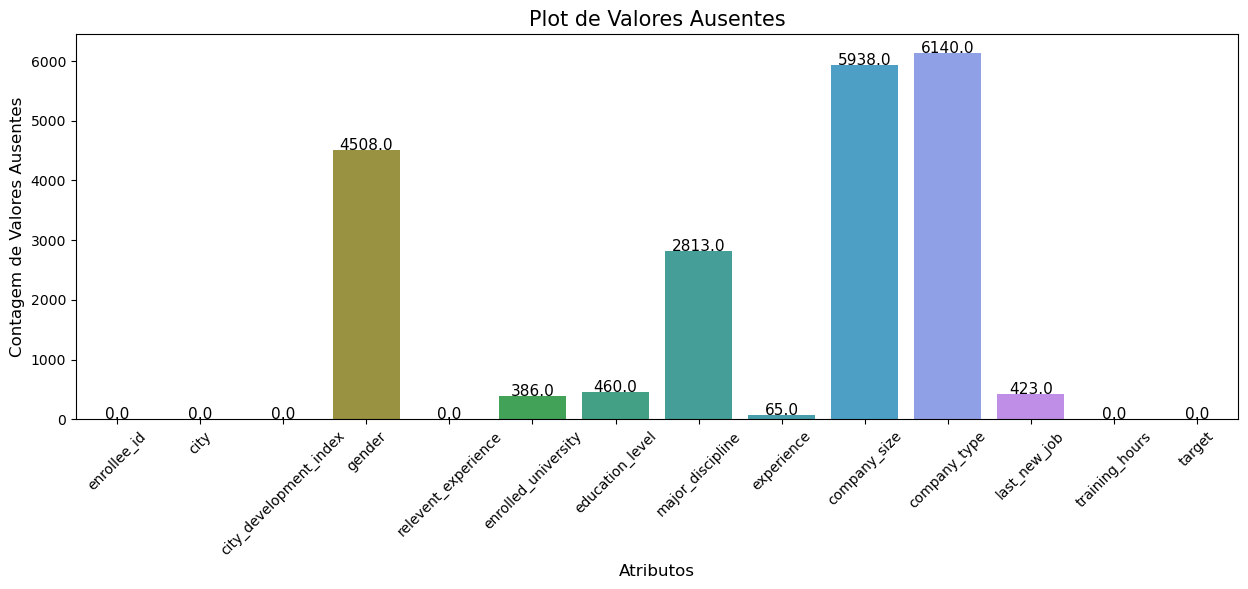

In [48]:
# Valores ausentes por coluna.
null_df = df.isna().sum().reset_index()

# Figura.
ax = plt.figure(figsize = (15,5))

# Barplot.
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [49]:
# Pode também ser criado um mapa de valores ausentes.

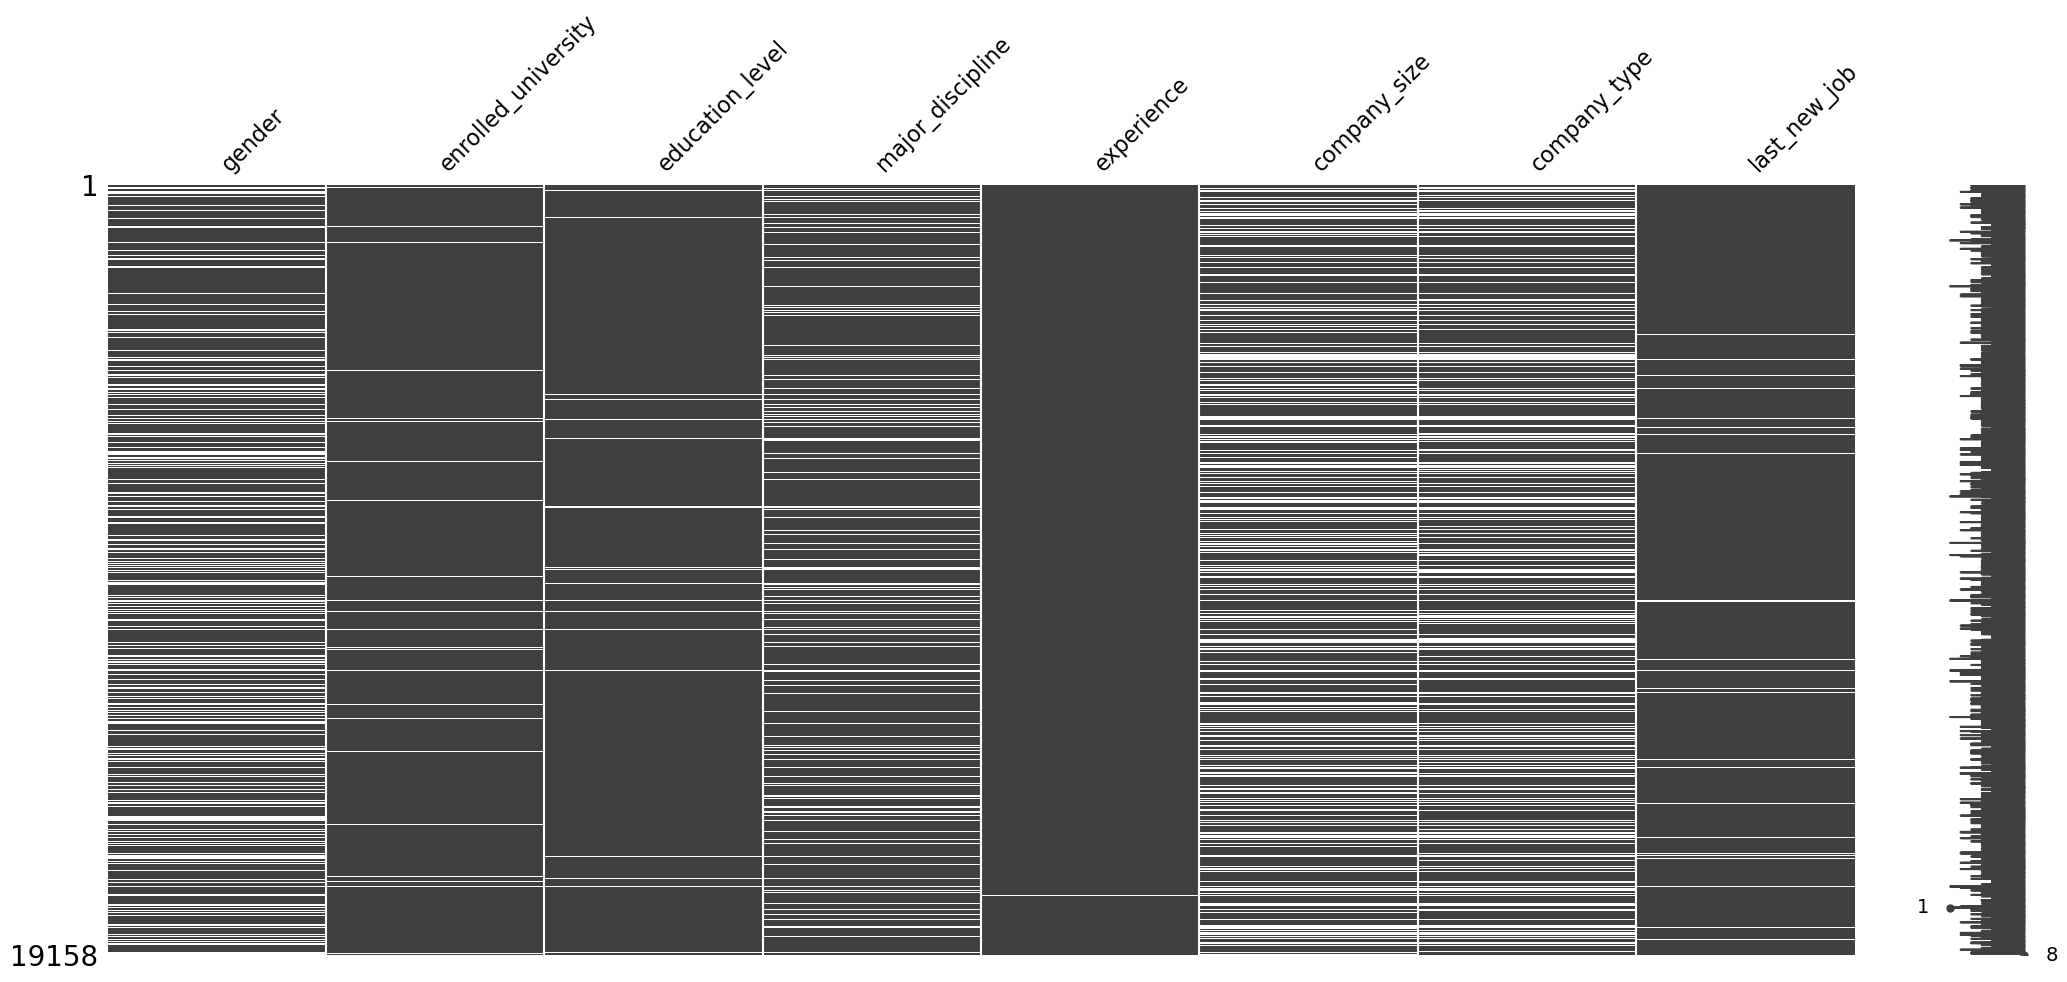

In [50]:
# Gera a visualização.

# Dataframe.
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes.
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [51]:
# Valores ausentes possuem um padrão aleatório.

### Identificando Valores Duplicados

In [52]:
df['enrollee_id'].duplicated().sum()

0

In [53]:
# Não há valores duplicados. A coluna de ID é a melhor para identificarmos se tem duplicidade.

### Identificando Valores Desbalanceados

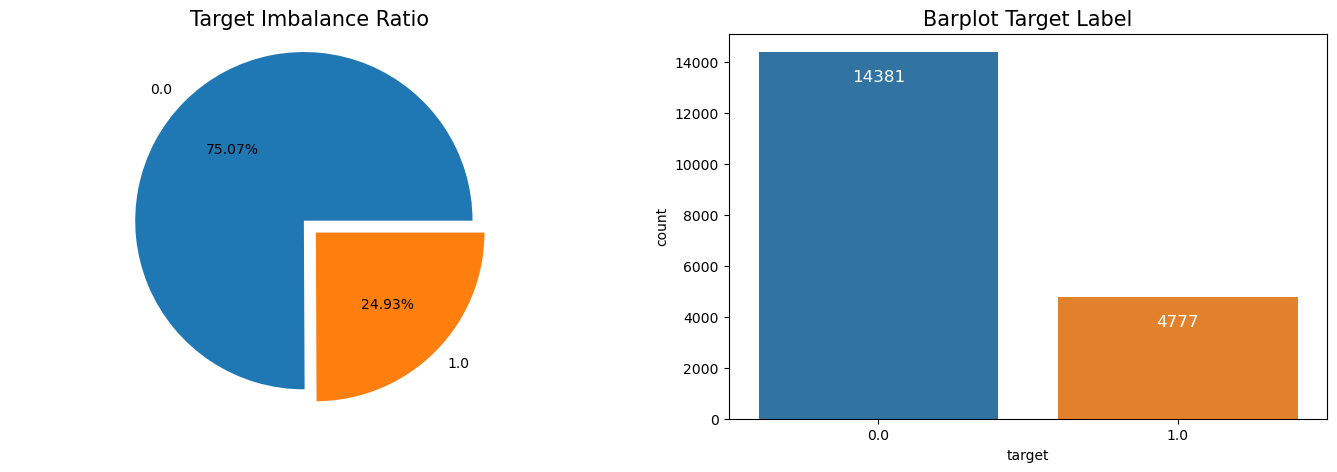

In [54]:
# Figura. Ambos os gráficos representam a mesma informação, são só visualizações diferentes. 
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

In [55]:
# Considerando nossa variável alvo, existem muito mais registros com resultado 0 do que 1. Ou seja, a maioria das pessoas fizeram o curso apenas por desenvolvimento ou coisas parecidas, não para procurar empregos. Os dados estão desbalanceados pelo fato de ter mais registros do que o outro. Isso pode ser um problema quando interpretamos o resultado, porque tem muito mais informações de uma classe do que outra. Isso é um problema, por exemplo, em modelos de machine learning.

## Limpeza e Processamento dos Dados

### Tratando os valores ausentes dando ênfase as variáveis categóricas

In [56]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [58]:
# Como já analisado, melhor retirar as variáveis com baixa relação.
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [59]:
new_df = df[colunas_manter]

In [60]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [61]:
# Apenas para comparar com o dataframe original.
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


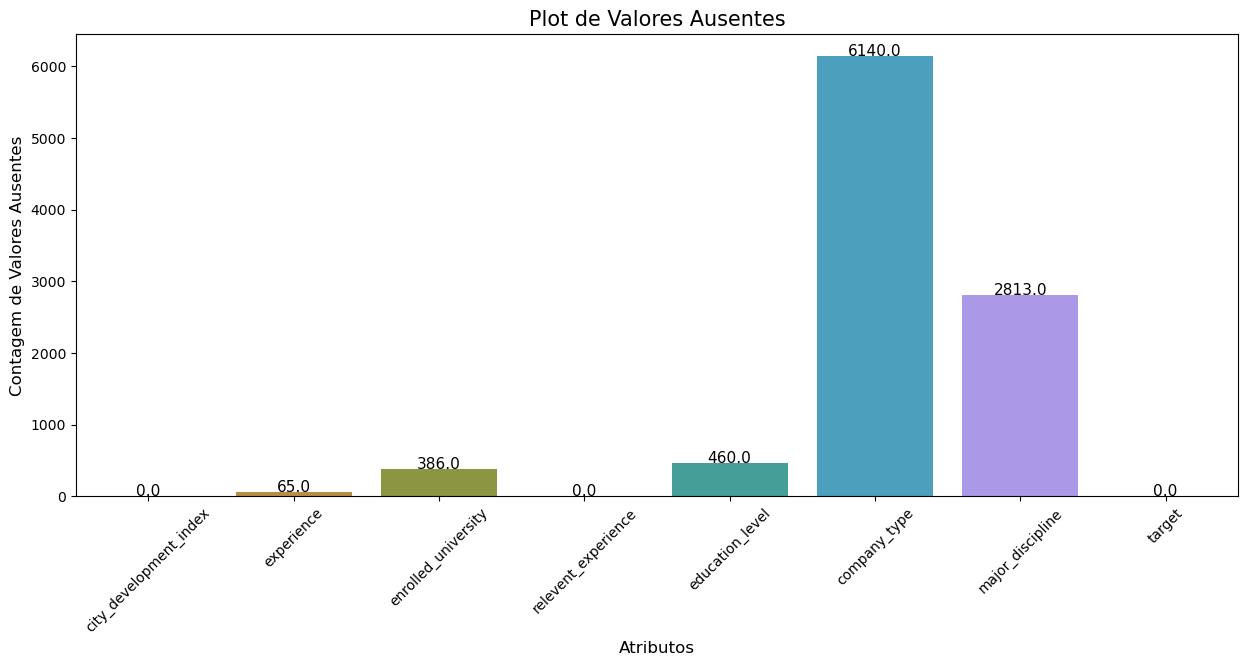

In [62]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [65]:
# Interpretando o gráfico, apenas 3 das variáveis não tem valores ausentes. Precisam ser tratados os valores ausentes dessas variáveis. As técnicas utilizadas precisam ser diferentes, uma vez que existem valores ausentes em variáveis tanto numéricas quanto categóricas.

### Variável major_discipline

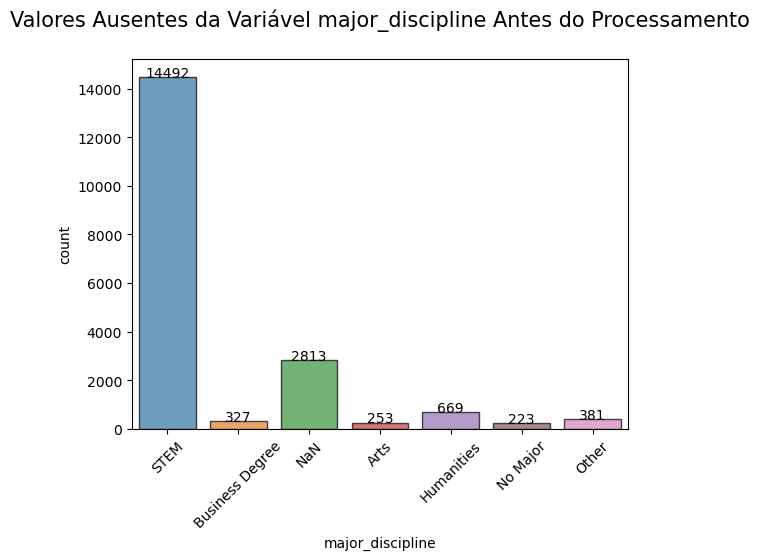

In [66]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [67]:
# Relação entre major_discipline x education_level. Dentre os registros de valores ausentes, é possível ver a proporção dentro da variável education_level.
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

In [68]:
# O Major significa especialização. Por entendimento dos dados, quem não tem High School e Primary School é porque não tem a Major. Sendo assim, trocar a variável para Non Degree.

In [69]:
# Cria o índice.
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [70]:
len(nan_index)

2785

In [71]:
# Imputação do valor ausente.
new_df['major_discipline'][nan_index] = 'Non Degree'

In [72]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

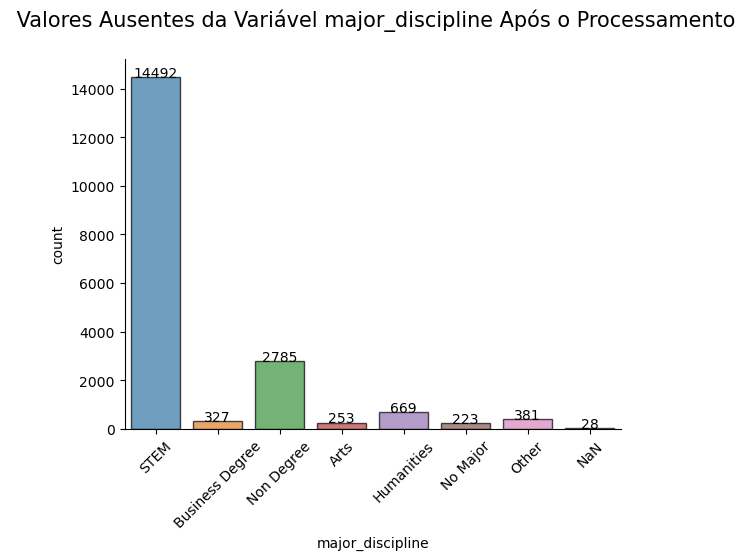

In [73]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [74]:
# Para os valores ausentes restantes preenchemos com 'Other'.
new_df[new_df['major_discipline'].isna()]  = 'Other'

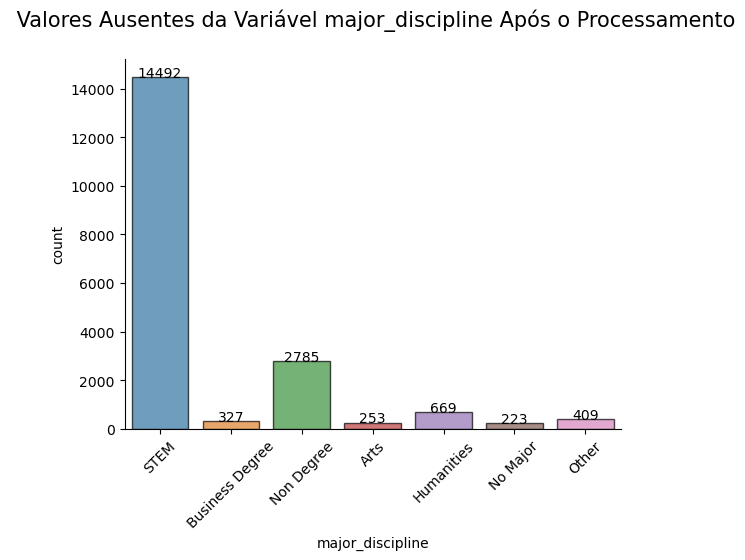

In [75]:
# Valores Ausentes da Variável major_discipline Após o Processamento.
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [76]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university

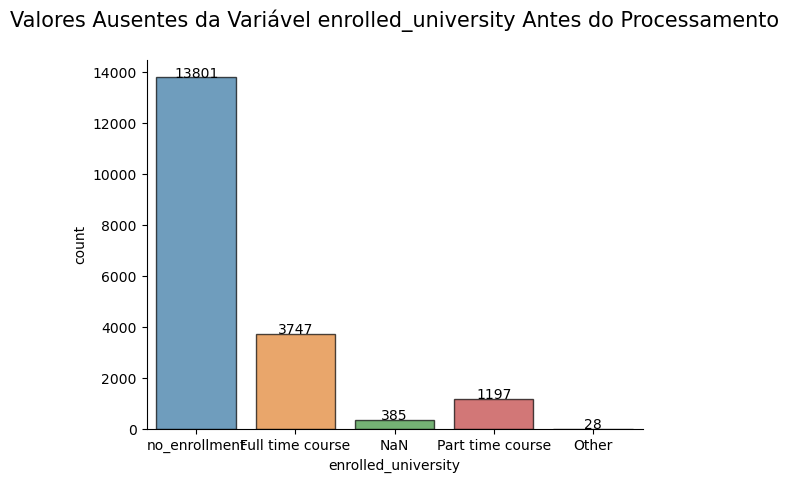

In [81]:
# Plot.
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [79]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [80]:
# Por interpretação, pessoas com Primary_School como education_level não podem ingressar na universidade. Portanto, preencheremos valores NaN em education_level para Primary Grad.

In [82]:
# Prepara o índice.
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [83]:
len(nan_index)

9

In [84]:
# Imputação de valores ausentes.
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [85]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [86]:
# Prepara o índice.
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [87]:
# O restante colocar como 'Other'.
new_df['enrolled_university'][nan_index] = 'Other'

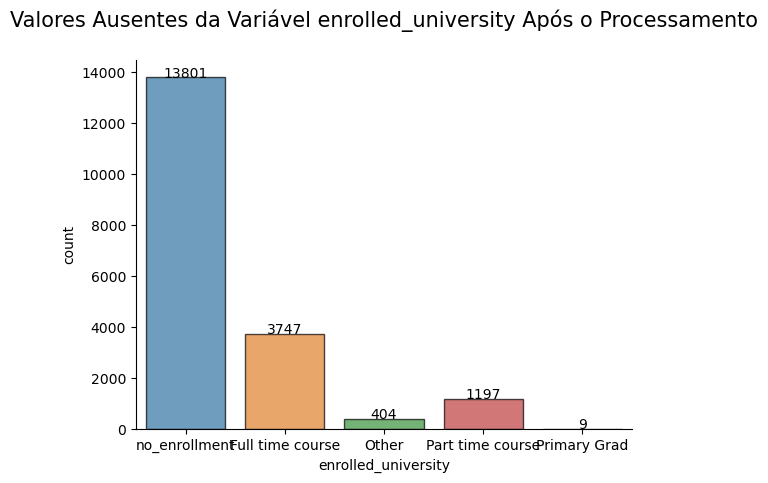

In [88]:
# Plot.
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

In [89]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

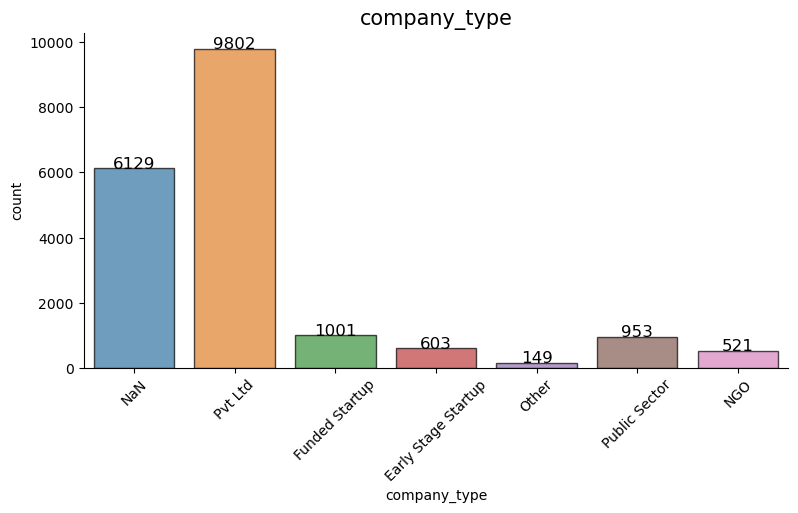

In [91]:
# Plot.
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [92]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [93]:
# Índice.
nan_index = new_df[(new_df['company_type'].isna())].index

In [97]:
# Imputação dos valores NaN com 'Other', pois não existem critérios melhores.
new_df['company_type'][nan_index] = 'Other'

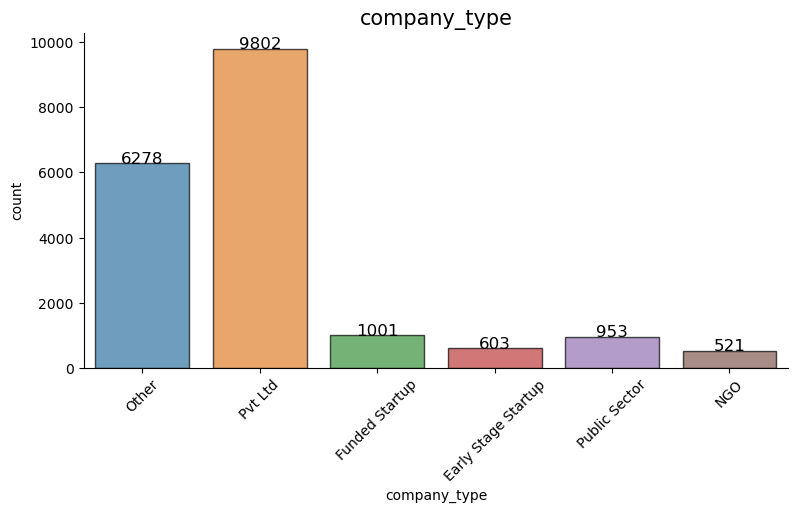

In [95]:
# Plot.
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [96]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level

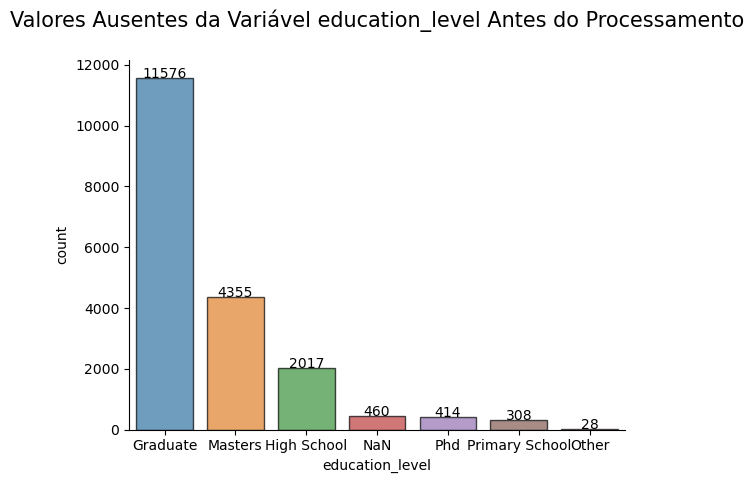

In [98]:
# Plot.
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [99]:
# Índice.
nan_index = new_df[(new_df['education_level'].isna())].index

In [100]:
# Imputação dos valores NaN com 'Other'. Interessante conversar com a área de negócios, quando possível, para ter melhores critérios. Caso não, utilizar técnica genérica.
new_df['education_level'][nan_index] = 'Other'

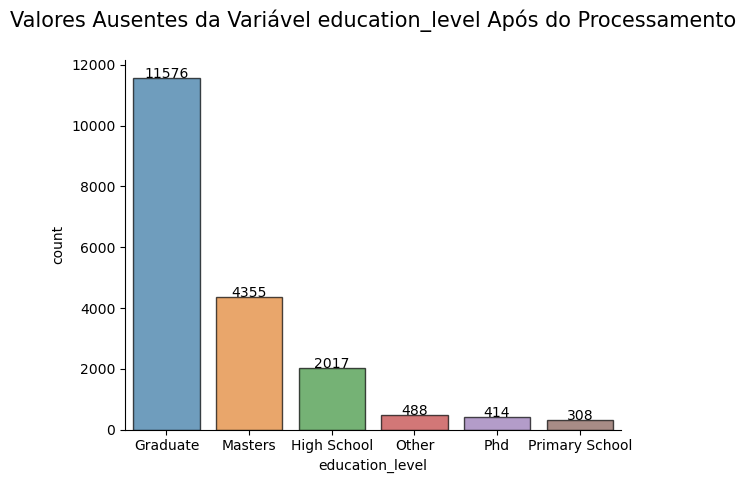

In [101]:
# Plot.
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

In [102]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience

In [103]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [106]:
# Como a cópia foi do dataframe original, a variável experience está como categórica. Posso converter novamente para numérica, mas utilizei uma técnica aplicável tanto para variável numérica quanto categórica.
# Calcular o percentual de valores ausentes dentro da variável.
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [107]:
# Como o percentual de valores ausentes é muito pequeno (0,32%), é melhor dropar a variável.

In [112]:
# Percentual de valores ausentes.
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

In [109]:
new_df['experience'].isnull().sum()

63

In [110]:
new_df.shape

(19158, 8)

In [111]:
new_df = new_df.dropna()

In [113]:
new_df.shape

(19095, 8)

In [114]:
# Percentual de valores ausentes.
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

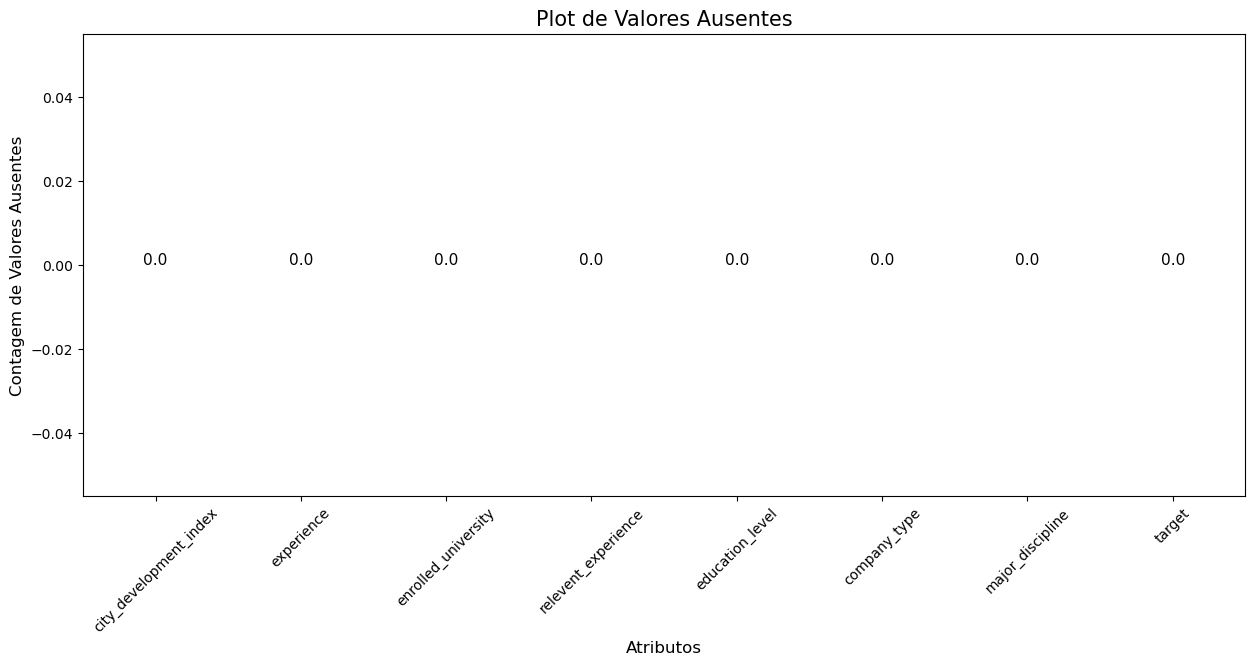

In [115]:
# Valores ausentes por coluna.
null_df = new_df.isna().sum().reset_index()

# Figura.
ax = plt.figure(figsize = (15,6))

# Barplot.
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

## Conferências Finais

In [116]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [117]:
# Ajustando os dados.
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [118]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [119]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

**Com base na análise observamos que as variáveis mais relevantes para identificar um bom candidato são:**

Índice de Desenvolvimento da cidade onde mora o candidato.
Tempo de experiência profissional.
Se está ou não matriculado em um curso universitário.
Se tem ou não experiência relevante.
O nível educacional.
O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
A especialização na graduação (quando for o caso).

**Não são relevantes para a análise:**

O ID do candidato.
O código da cidade do candidato.
O gênero.
A última vez que o candidato esteve empregado.
O tamanho da empresa (quando for o caso).
Total de horas de treimamento.

**Recomendações do Analista de Dados:**

* O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso. 

* O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

* O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.

## Fim